# INFO 2950 Final Project: Predicting High School Students' Alcohol Consumption <a name = "top"></a>
*Sarah Langleben (sml343), Victor Bisbal (vab59), and Kendra Obika (kao78). Fall 2021.*

## Table of Contents:
1. [Introduction](#introduction)
    - [Background Information and Context](#background)
    - [Key Terms and Data Sources](#key)
    - [Research Questions](#researchquestions)
    - [Summary of Findings](#overview)
2. [Data Cleaning Appendix](#cleaning)
    - [Step 1: imports](#step1)
    - [Step 2: pd.read_csv()](#step2)
    - [Step 3: data.head()](#step3)
    - [Step 4: ](#step4)
    - [Step 5: drop NaN](#step5)
    - [Step 6](#step6)
    - [Step 7: rename columns](#step7)
    - [Step 8: 'MeanScore', 'MeanAlc', 'SumAlc'](#step8)
    - [Step 9](#step9)
    - [Step 10](#step10)
3. [Q1: Is there a relationship between lower test scores/more failures and higher alcohol consumption?](#Q1)
    - [Linear Regression](#linRegQ1)
    - [Permutations](#permute)
4. [Q2: Can parental status have an impact on their high school aged child's consumption?](#Q2)
    - [Q2.1: Would a high schooler with parents who both work in healthcare drink less?](#Q2.1)
    - [T-test](#ttest)
5. [Q3: Do students with a greater number of absences have a higher alcohol consumption?](#Q3)
    - [Predicting with linear regression](#absencesLinReg)
6. [Data Description](#description)
    - [3.1](#3.1)
    - [3.2](#3.2)
    - [3.3](#3.3)
    - [3.4](#3.4)
    - [3.5](#3.5)
7. [Limitations](#limitations)
8. [Questions for Reviewers](#questions)
9. [Conclusion](#conclusion)
9. [References](#references)

## Introduction <a name="introduction"></a>
_______
### Background Information and Context  <a name= "background"></a>

The dataset we are using was originally created to predict secondary school performance in the academic paper Using Data Mining to Predict Secondary School Student Performance. The dataset contains information on 649 Portuguese secondary school students, which was collected through surveys and questionnaires in the 2005-2006 school year. 

Alcohol is the most used psychoactive among adolescents. According to the CDC, in the <a href = https://www.cdc.gov/healthyyouth/data/yrbs/index.htm>2019 Youth Risk Behavior Survey</a> 29% of surveyed high school students drank alcohol, and 14% binge drank. Alcohol abuse is the third leading cause of ill health and premature death (WHO), making it a major public health issue that both public health officials and local community members must work to address through increased awareness and education surrounding alcohol consumption. 

In Portugal, the minimum age limit for sales of alcohol is 16. The national maximum BAC levels (g/litre) is 0.05, and the adult per capital alcohol consumption is 13.43 litres, with national surveys reporting 12.20% of male respondents partaking in heavy episodic drinking, and 2.7% of female respondents partaking in heavy episodic drinking. (WHO) 

The goal of this project is to understand what traits make a student more or less likely to drink, and if there is a correlation between specific conditions, how might we predict student's drinking habits? Can we prove a relationship between seemingly unrelated student traits and alcohol consumption? The results of this analysis are intended to be a resource to the readers to enable them to better understand student alcohol consumption habits and what traits make a student more likely to drink at an early age. 

### Key Terms and Data Sources <a name= "key"></a>
Our dataset is sourced from the UCI Machine Learning Repository: <a href = https://archive.ics.uci.edu/ml/datasets/student+performance>Student Performance Data Set</a>

key terms:
- <u>binge drinking</u> - Binge drinking is defined as a pattern of drinking that brings a person's blood alcohol concentration (BAC) to 0.08 g/dl or above. (CDC)
- <u> substance abuse</u> - Excessive use of psychoactive drugs, such as alcohol, pain medications, or illegal drugs. (Mayo Clinic)
- <u> design matrix</u> -  a matrix of values of explanatory variables of a set of objects. Each row represents an individual object, with the successive columns corresponding to the variables and their specific values for that object.
- <u> linear regression</u> - a linear approach for modelling the relationship between a scalar response and one or more explanatory variables.
- <u> dummy variables</u> - a variable that takes only the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome. 
- <u> bootstrapping</u> - a method of inferring results for a population from results found on a collection of smaller random samples of that population, using replacement during the sampling process.

Attributes used in our analysis:
- <u>school</u> - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- <u>sex</u> - student's sex (binary: 'F' - female or 'M' - male)
- <u>age</u> - student's age (numeric: from 15 to 22)
- <u>address</u> - student's home address type (binary: 'U' - urban or 'R' - rural)
- <u>famsize</u> - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- <u>Pstatus</u> - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- <u>MotherEdu</u> - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- <u>FatherEdu</u> - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- <u>MotherJob</u> - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- <u>FatherJob</u> - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- <u>reason</u> - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- <u>guardian</u> - student's guardian (nominal: 'mother', 'father' or 'other')
- <u>traveltime</u> - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- <u>studytime</u> - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- <u>failures</u> - number of past class failures (numeric: n if 1<=n<3, else 4)
- <u>famsup</u> - family educational support (binary: yes or no)
- <u>paid</u> - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- <u>activities</u> - extra-curricular activities (binary: yes or no)
- <u>nursery</u> - attended nursery school (binary: yes or no)
- <u>HigherEd</u> - wants to take higher education (binary: yes or no)
- <u>internet</u> - Internet access at home (binary: yes or no)
- <u>romantic</u> - with a romantic relationship (binary: yes or no)
- <u>famrel</u> - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- <u>freetime</u> - free time after school (numeric: from 1 - very low to 5 - very high)
- <u>goOut</u> - going out with friends (numeric: from 1 - very low to 5 - very high)
- <u>M-F Alc</u> - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- <u>S-S Alc</u> - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- <u>health</u> - current health status (numeric: from 1 - very bad to 5 - very good)
- <u>absences</u> - number of school absences (numeric: from 0 to 93)
- <u>Score1</u> - first period grade (numeric: from 0 to 20)
- <u>Score2</u> - second period grade (numeric: from 0 to 20)
- <u>Score3</u> - final grade (numeric: from 0 to 20, output target)
- <u>MeanScore</u> - average of the first, second, and final grades
- <u>MeanAlc</u> - average alcohol consumption (average of M-F Alc and S-S Alc)
- <u>SumAlc</u> - sum of alcohol consumption column
_____
### Research Questions <a name = "researchquestions"></a>
Main question: __Is there a relationship between specific student traits and alcohol consumption?__
To answer this question, we use the following research questions (in order of appearance in this .ipynb file):
1. Is there a relationship between lower test scores/more failures and higher alcohol consumption? 
2. Can parental status have an impact on their high school aged child's alcohol consumption?
    - Would a high schooler with parents who work in healthcare drink less?
3. Do students with a greater number of absences drink more alcohol?

### General Overview <a name = "overview"></a>
1. We cleaned the data, removing any null values and renaming any misleading column names to make our data easier to understand and use. We also added a couple columns to give us averages that will be useful later in our analysis. 

2. (Q1) We assess the correlation between average alcohol consumption for an individual student and failures to see if alcohol consumption has any measurable impact on student performance. Seeing how these two values influence eachother will be useful to understand how performance in school (specifically failing a class) can be an indicator of a student's alcohol consumption. 

3. (Q1) We found the correlation between average grades and average alcohol consumption. This will also help us see if there is any connection between alcohol consumption and academic performance that we can use to predict how much the students are drinking. 

4. (Q1) We used multiple linear regression to predict average alcohol consumption with average grades and failures. 

5. (Q1) We shuffled the data using permutations to see how our regression predicts when x and y values have been disassociated. 

6. (Q2) We turned categorical variables (Pstatus, famrel, Mjob, Fjob) into dummy variables using pd.get_dummies(), to enable us to use linear regression to predict consumption based on those variables. 

7. (Q2) We assessed how parent occupations influence alcohol consumption, specifically, would having a parent in the healthcare sector make a difference in consumption levels?

8. (Q2) We performed a t-test to assess if there is a significant difference between the mean alcohol consumption of students with healthcare sector parents and non-healthcare sector students is any different.

9. (Q3) We shifted focus to absences, comparing alcohol students of students with less than three absences to students with more than 10 absences, using the bootstrap method and a t-test to assess differences. 

10. (Q3) we used linear regression to predict alcohol consumption based on absences. 

## Data Cleaning <a name="cleaning"></a>

In [1]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats #for statisical tests
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

**Data Cleaning Step 1**: Imported all necessary libraries that will be used throughout our data analysis. <a name="step1"></a>

In [2]:
data = pd.read_csv('student-por.csv')

**Data Cleaning Step 2**: Called pd.read_csv() to read both comma-separated values (csv) files into DataFrames. <a name="step2"></a>

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


**Data Cleaning Step 3**: Called data.head() to verify that the csv file was read correctly into a Dataframe. <a name="step1"></a>

In [4]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 649 rows and 33 columns


**Data Cleaning Step 4**: Printed out the number of rows and columns in our dataset to see the total number of rows and columns and to verify that it has the same number of rows and columns as the original dataset from where we extracted the data. <a name="step4"></a>

In [5]:
data.dropna(inplace=True)

**Data Cleaning Step 5**: We dropped all NaN values in the dataset and set inplace=True so that the changes are saved to the original dataframe. <a name="step5"></a>

In [6]:
data.isnull().sum().sum()

0

There were no empty rows in this dataset!

**Data Cleaning Step 6**: After dropping all NaN values, we checked to see the if total NaN values in the dataset is equal to zero.
<a name="step6"></a>

In [7]:
data.rename(columns={"higher":"HigherEd", "goout":"goOut", "Dalc":"M-F Alc", "Walc":"S-S Alc",
                     "Medu":"MotherEdu", "Fedu":"FatherEdu", "Mjob":"MotherJob", "Fjob": "FatherJob",
                     "G1":"Score1", "G2":"Score2", "G3":"Score3"}, 
            inplace= True)

**Data Cleaning Step 7**: We renamed the columns of the dataframe to column names that are more generally understood. The inplace=True is used once again to save changes to the original dataframe. <a name="step7"></a>

In [8]:
#Add a mean scores column
data['MeanScore'] = (data.Score1 + data.Score2 + data.Score3)/3

#Add a mean alcohol consumption column
data['MeanAlc'] = (data['M-F Alc'] + data['S-S Alc'])/2

#Add a sum of alcohol consumption column
data['SumAlc'] = data['M-F Alc'] + data['S-S Alc']

**Data Cleaning Step 8**: Here we created new columns within our dataset ('MeanScore', 'MeanAlc', 'SumAlc') to use for future calculations. <a name="step8"></a>

In [9]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'MotherEdu',
       'FatherEdu', 'MotherJob', 'FatherJob', 'reason', 'guardian',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'HigherEd', 'internet', 'romantic', 'famrel',
       'freetime', 'goOut', 'M-F Alc', 'S-S Alc', 'health', 'absences',
       'Score1', 'Score2', 'Score3', 'MeanScore', 'MeanAlc', 'SumAlc'],
      dtype='object')

**Data Cleaning Step 9**: Called data.columns to verify that the newly created columns have been successfully added to our dataframe. <a name="step9"></a>

In [10]:
data.dtypes

school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
MotherEdu       int64
FatherEdu       int64
MotherJob      object
FatherJob      object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
HigherEd       object
internet       object
romantic       object
famrel          int64
freetime        int64
goOut           int64
M-F Alc         int64
S-S Alc         int64
health          int64
absences        int64
Score1          int64
Score2          int64
Score3          int64
MeanScore     float64
MeanAlc       float64
SumAlc          int64
dtype: object

**Data Cleaning Step 10**: Called data.dtypes to check that all columns' dtypes match what they are supposed to be. <a name="step10"></a>

## Question 1: Is there a relationship between lower test scores/more failures and higher alcohol consumption? <a name="Q1"></a>
___

Our first steps in exploring the data was to get a general understanding between two quantifiable measures of student wellbeing and alcohol consumption: average alcohol consumed and grades. Using a simple line plot, with x being failures and y being average alcohol consumption we can visualize the connection— if any— between alcohol consumption and in-school performance.  

The correlation between failures and Mean Alcohol consumption is 0.102.


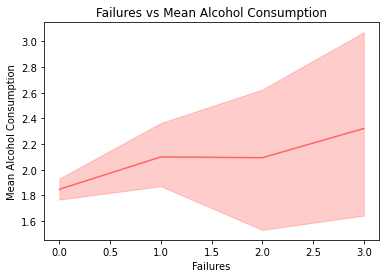

In [11]:
sns.lineplot(x= data['failures'], y=data['MeanAlc'], color = 'red', alpha=0.5);
plt.title('Failures vs Mean Alcohol Consumption')
plt.xlabel('Failures')
plt.ylabel('Mean Alcohol Consumption')
print(f'The correlation between failures and Mean Alcohol consumption is {data.failures.corr(data.MeanAlc):.3}.')

In the figure above, we have plotted student failures in relation to average levels of alcohol consumption for students. The data from the 'failures' column is plotted on the x axis. The mean alcohol consumption ('MeanAlc' column), which was previously calculated by averaging out the weekday alcohol consumption (column 'M-F_Alc') and weekend alcohol consumption (column 'S-S_Alc'), is plotted on the y axis. From the plot, we can see there is a weak positive correlation between failures and average alcohol consumption. There is a generally increasing trend in the average alcohol consumption as the number of past class failures increases. In order to solidify our assumptions about the plot, we calculated the Pearson correlation between the two variables (0.102; a weak positive correlation). 

The red shading around the line plot represents standard error. This red shading may be considered a potential limitation as it may be hard for some readers to interpret. 

The correlation between Mean Test Scores and Mean Alcohol consumption is -0.208.


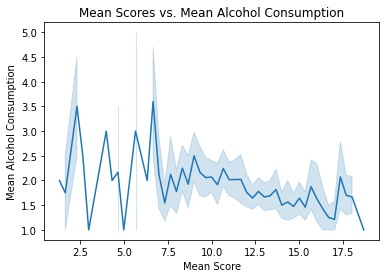

In [12]:
sns.lineplot(x= data['MeanScore'], y=data['MeanAlc']);
plt.title('Mean Scores vs. Mean Alcohol Consumption')
plt.xlabel('Mean Score')
plt.ylabel('Mean Alcohol Consumption')

print(f'The correlation between Mean Test Scores and Mean Alcohol consumption is {data.MeanScore.corr(data.MeanAlc):.3}.')

The above figure plots the mean alcohol consumption as a function of the mean score students recieve on exams. The 'MeanScore' column was calculated by finding the average score from the 'G1', 'G2', and 'G3' columns, which tell us exam scores in the first, second, and third school periods. From the plot we can see that there is a weak negative correlation between Mean Score and Mean Alcohol Consumption. 

The plot reveals an overall decrease in Mean Alcohol Consumption as the Mean Scores increase— that is, the less alcohol a student consumes, the better their score will be. 

A potential limitation is that readers may have trouble interpreting the high amount of variation in the first half of the graph as well as the blue shading around it. The high variation in the first half of the graph may account for the many other reasons a student may have done poorly on an exam that is not related to their alcohol consumption (i.e. mental illness, lack of resources, cheating, etc.). The blue shading around the lineplot represents the standard error. In order to solidify our assumptions about the plot, we calculated the Pearson correlation between the two variables to get -0.208; a weak negative correlation.

This analysis shows us that there is some form of a linear relationship between alcohol consumption, exam scores, and failed courses, which means we are able to use linear regression to predict how these two variables influence our dependent variable, alcohol consumption.

### Linear Regression <a name = "linRegQ1"></a>
___

In [27]:
# regress MeanAlc on MeanScore and failures
dataQ1 = data[['failures', 'MeanScore']]

mlr1 = LinearRegression()
mlr1.fit(dataQ1, data['MeanAlc'])

for i in range(len(dataQ1.columns)):
    print(f'The regression coefficient for {dataQ1.columns[i]} s: {mlr1.coef_[i]:.2}')
print(f'Lastly, the intercept is {mlr1.intercept_:.3}')

The regression coefficient for failures s: 0.036
The regression coefficient for MeanScore s: -0.07
Lastly, the intercept is 2.7


We used multiple linear regression to calculate the regression coefficients for both 'failures' and 'MeanScore' with relation to 'MeanAlc' (mean alcohol consumption). We used a for-loop to calculate the regression coefficients. The way we interpret the regression coefficients is shown below:

- Failures: For every one unit increase in failures, we can expect the mean alcohol consumption to increase by 0.036 while holding mean test scores constant.

- MeanScore: For every one unit increase in mean test score, we can expect the mean alcohol consumption to decrease by 0.0699 while holding failures constant.

The intercept can be interpreted as:

- Intercept: When the mean score of tests is zero and failures are zero, the expected mean alcohol consumption is 2.696.

Some potential limitations for calculating the regression coefficients is that we are only considering linear relationships and that there may be other variables other than 'failures' and 'MeanScore' which have not been studied, yet may have influenced the response variable. 

To see what this relationship would look like if test scores and alcohol consumption were not related, we can use permutation to shuffle our data:

### Permute 

In [44]:
def permute(input_array):
    """
    Function that randomly shuffles the values of an inputted array.
    """
    permuted = input_array.copy().values 
    np.random.shuffle(permuted)
    return pd.Series(permuted)

#Permutted our MeanAlc column
permutedY = permute(data['MeanAlc'])
mlr0 = LinearRegression().fit(dataQ1, permutedY)

In the cell above, we created the permute function to rearrange the y data points randomly to where there is no relationship to x anymore. If we permute our y data and fit a linear model to it, we will obtain the results of a trial under the null hypothesis, or where y and x have no relationship. 

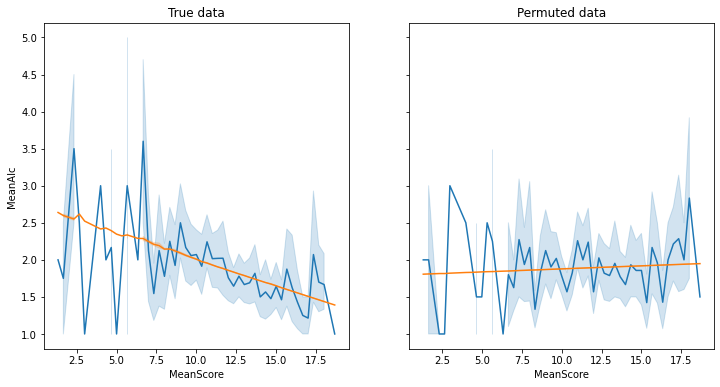

In [45]:
# plotting ONE instance of permuted data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharey=True)
sns.lineplot(x = data['MeanScore'], y = data['MeanAlc'], ax=ax1)
sns.lineplot(x = data['MeanScore'], y = mlr1.predict(dataQ1), ax=ax1);
ax1.set_title('True data')
sns.lineplot(x = data['MeanScore'], y= permutedY, ax=ax2)
sns.lineplot(x = data['MeanScore'], y = mlr0.predict(dataQ1), ax=ax2)
ax2.set_title('Permuted data');

In [16]:
# what fraction of permuted (null hypothesis) slopes are greater than our observed slope?
steeper_slopes = 0
n_permutations = 500
permuted_slopes = np.zeros(n_permutations)

for i in range(n_permutations):
    permuted_model = LinearRegression().fit(data[['failures','MeanScore']], permute((data['MeanAlc'])))
    permuted_slopes[i] = mlr0.coef_[1] #We're mainly focusing on the MeanScore feature
    if np.abs(mlr0.coef_[1]) > np.abs(mlr1.coef_[1]): #Checking if the null slope generated is greater than the real
        steeper_slopes += 1
    
print(f'Fraction of permuted slopes of a greater magnitude than observed slope: {steeper_slopes / n_permutations}')

print('Simulated p-value:', steeper_slopes / n_permutations)

Fraction of permuted slopes of a greater magnitude than observed slope: 0.0
Simulated p-value: 0.0


In the cell above, we used a for-loop to obtain 500 different permutations of our y data and used each permuted data to calculate regression coefficients. Then, in order to obtain the fraction of permuted (null hypothesis) slopes that are greater than our observed slope we used an if statement to see if the absolute value of the regression coefficient calculated from the permuted data is greater than the absolute value of the regression coefficient calculated from the original data. If it was greater, then we added 1 to the steeper_slopes variable. After running the code, we see that there are no permuted slopes of a greater magnitude than the observed slope. **Potential Limitations?**  

Our analyses up until now have been focused primarily on quantifiable measures of students' academic achievement, in which we can see that there is a relationship between our academic variables and alcohol consumption. What other factors might influence how much a student drinks?

## Question 2: Can parental status have an impact on their high school aged child's alcohol  consumption? <a name = "Q2"></a>
____

We are trying to understand the role parents have on their childrens' alcohol consumption. Does it matter what job a parent has? Would a student with doctor-parents drink less than one without? First, to get a general understanding of our students' parents, we made a bar graph of the students based on their mother and fathers' jobs. 

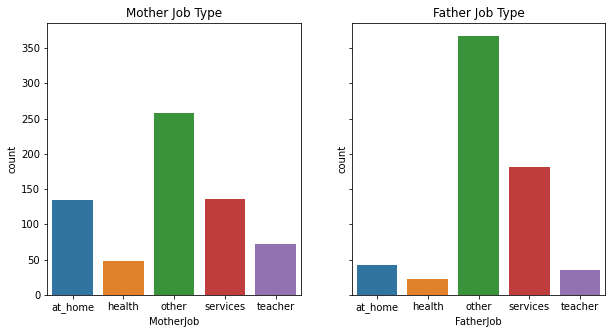

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)
sns.countplot(x = data.MotherJob.sort_values(), ax=ax1)
ax1.set_title('Mother Job Type')
sns.countplot(x = data.FatherJob.sort_values(), ax=ax2)
ax2.set_title('Father Job Type');

The above bar graphs organize students' parents based on their job, which has been organized into 5 categories: 'at_home', 'health', 'other', 'service', or 'teacher'. There is one graph for mothers, and another for fathers. Overall, we see that the majority of both mothers and fathers have careers in the 'other' category, there are more mothers who are in the 'at_home' category than fathers, more mothers are teachers, and more mothers are in the health sector. There are more fathers in the 'service' sector than there are mothers. 

In [18]:
#Turn categorical variables (Pstatus, famrel, MotherJob, FatherJob) into dummy variables
data['Pstatus'] = pd.get_dummies(data['Pstatus'],drop_first=True)
data['famrel'] = pd.get_dummies(data['famsup'],drop_first=True)

mjob = pd.get_dummies(data['MotherJob'], prefix = 'M', drop_first=True)
fjob = pd.get_dummies(data['FatherJob'], prefix = 'F', drop_first=True)

Above we are using the pd.get_dummies() function on the categorical variables in our regression in order to obtain binary/indicator variables. This way it will be easier to use this data to compute statistics. Below, we combine the different matrices and take a look at our design matrix.

In [19]:
X = pd.concat([mjob,fjob, data[['Pstatus','famrel']]],axis=1)

X.head()

,M_health,M_other,M_services,M_teacher,F_health,F_other,F_services,F_teacher,Pstatus,famrel
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,1,1
2,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,1,0,1,1
4,0,1,0,0,0,1,0,0,1,1


In [20]:
#Regress these variables on MeanAlc

mlr1 = LinearRegression()
mlr1.fit(X, data['MeanAlc'])

for i in range(len(X.columns)):
    print(f'{X.columns[i]}: {mlr1.coef_[i]:.2}')
print(f'Lastly, the intercept is {mlr1.intercept_:.3}')

M_health: -0.058
M_other: -0.038
M_services: 0.12
M_teacher: 0.13
F_health: 0.14
F_other: 0.16
F_services: 0.32
F_teacher: -0.13
Pstatus: 0.17
famrel: -0.11
Lastly, the intercept is 1.61


In the cell block above, we used multiple linear regression to calculate the regression coefficients for all features (columns) in the X dataframe with relation to 'MeanAlc' (mean alcohol consumption). The way in which we interpret the regression coefficients is shown below:

- The expected difference in mean alcohol consumption between a student with a stay-at-home mother and a student with a  mother as a teacher increases by 0.13 while keeping other features constant.

- The expected difference in mean alcohol consumption between a student with a stay-at-home father and a student with a father as a civil service member (administration or police) increases by 0.32 while keeping other features constant.

- The expected difference in mean alcohol consumption between a student with separated parents and a student with parents who live together increases by 0.17 while keeping other features constant. (Which we did not expect, we assumed the MeanAlc would decrease).

- The expected difference in mean alcohol consumption decreases by 0.11 as famrel-- quality of family relationships-- increases by 1 increment (from very bad to excellent) while keeping other features constant.

Some potential limitations for calculating the regression coefficients is that we are only considering linear relationships and that there may be other variables which have not been studied, yet may have influenced the response variable. 

### Question 2.1: Would a high schooler with parents who both work in healthcare drink less? <a name = "Q2.1"></a>
____

After analyzing how the general student population's drinking habits are influenced by their parents' careers, we were particularly curious if the children of healthcare professionals were influenced to drink less:

### T-test <a name = "ttest"></a>

In [21]:
# Both parents working in healthcare vs neither parent working in health care
health = data[(data.MotherJob == 'health') & (data.FatherJob == 'health')].MeanAlc
non_health = data[(data.MotherJob != 'health') & (data.FatherJob != 'health')].MeanAlc

tstatH, pvalH = stats.ttest_ind(a=health, b=non_health, equal_var=False)[:]

print(f'The tstat is {round(tstatH, 3)} and the pval is {round(pvalH,3)}.')

The tstat is -1.645 and the pval is 0.137.


In the cell block above, we stored the 'MeanAlc' values for students whose parents are both in the health-care field in the 'health' variable, and the stored the 'MeanAlc' values for students whose parents are not in the health_care field in the variable 'non_health'. We did this in order to conduct a t-test between the mean alcohol consumption for students with parents in the healthcare field and the mean alcohol consumption for those with parents not in the healthcare field. This will reveal how significant the differences between the groups are. After conducting this test, we recieved a p-value of 0.137 which is greater than our assumed alpha of 0.05. Using the p-value, we conclude that we do not have enough evidence to suggest that the students that have parents with jobs in the health-care field drink significantly less than other students. One of the asumptions of a t-test is that the data must be randomly sampled and that the sample populations must have the same variance. In this data, we do not know if the two sample populations vary the same and we do not know if the subjects were randomly selected. These limitations may make our t-test unreliable.

## Question 3: Do students with a greater number of absences have a higher alcohol consumption? <a name = "Q3"></a>
___

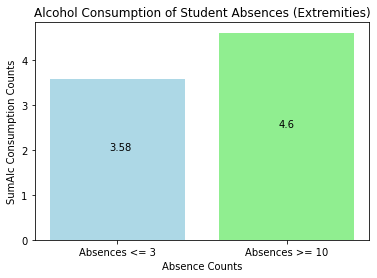

In [22]:
plt.bar(x = ["Absences <= 3", "Absences >= 10"], 
        height = [data[data.absences <= 3].SumAlc.mean(),   data[data.absences >= 10].SumAlc.mean()],
        color = ['lightblue', 'lightgreen'], animated= True)
plt.title("Alcohol Consumption of Student Absences (Extremities)")
plt.xlabel("Absence Counts")
plt.ylabel("SumAlc Consumption Counts")
plt.text(x = -0.05, y = 2, s = '3.58')
plt.text(x = .95, y = 2.5, s = '4.6');

In the cell above, we calculate the mean of the sum of alcohol consumption for students with absences less than or equal to three and did the same for students with absences greater than or equal to ten. We then graphed the two means in bar chart above. From this we can conclude that students with absences greater than or equal to ten tend to have a higher average of alcohol consumption (4.6) compared to students with absences less than or equal to three (3.58). We do not see any potential limitations in this portion of our answer.

In [23]:
n_bootstrap = 500
bootstrap_slopes = np.zeros(n_bootstrap)

for i in range(n_bootstrap):
    resampled_data = data.sample(n=len(data), replace=True)
    resampled_model = LinearRegression().fit(resampled_data[["absences"]], resampled_data["SumAlc"])
    bootstrap_slopes[i] = resampled_model.coef_[0]
    
print(f'The 95% confidence interval is: {np.round(np.quantile(bootstrap_slopes, q=[0.025, 0.975]), 3)}')

The 95% confidence interval is: [0.044 0.12 ]


The bootstrap method tells us that *if* there is a relationship between absences and alcohol consumption, that we are 95% confident that the true slope would fall between the interval of 0.042 and 0.118.


Now we want to see the relationship between students' alcohol consumption with low, allowable absences versus students with illegal truancy levels of absences:

In [24]:
under3 = data[data.absences <= 3]
over3 = data[data.absences >= 10]

tstat, pval = stats.ttest_ind(a=under3.SumAlc, b=over3.SumAlc, equal_var=False)[:]

print(f'The t-statistic is {round(tstat, 2)} and the p-value is {round(pval,4)}.')

#Large relationship found with t-test method.

The t-statistic is -3.55 and the p-value is 0.0006.


After conducting a test between alcohol consumption for students with absences greater than or equal to ten and students with absences less than or equal to three, we recieved a p-value of 0.0006 which is less than our assumed alpha of 0.05. Therefore we can conclude that these results did not occur by chance and that there is evidence to suggest that students with more absences drink (on average) more than those who have fewer absences.

Lets predict how much alcohol should be consumed by a student with 2 absences and for a student with 30 absences and compare them to their actual consumption:

### Predicting with Linear Regression <a name = "absencesLinReg"></a>

In [25]:
lr = LinearRegression()
lr.fit(data[['absences']], data['SumAlc'])

prob2 = lr.predict([[2]])
print(f'The predicted MeanAlc of a student with 2 absences: {prob2[0]:.3}')
print(f'The actual MeanAlc of a student with 2 absences: {data[data.absences == 2].SumAlc.mean():.3}')

print('\n')

prob30 = lr.predict([[30]])
print(f'The predicted MeanAlc of a student with 30 absences: {prob30[0]:.3}')
print(f'The actual MeanAlc of a student with 30 absences: {data[data.absences == 30].SumAlc.mean():.3}')

The predicted MeanAlc of a student with 2 absences: 3.65
The actual MeanAlc of a student with 2 absences: 3.66


The predicted MeanAlc of a student with 30 absences: 5.83
The actual MeanAlc of a student with 30 absences: 5.0


The value calculated by the prediction method increases as absences increase. When comparing the predicted mean alcohol consumption and the actual mean alcohol consumption, we see that this prediction model seems fairly accurate at predicting the mean alcohol consumtpion when there are more observations to average together (there are more students with 2 absences than there are with 30 absences). As the observation count decreases with higher absences, the accuracy is less precise.

## Data Description <a name = "description"></a>
____

### 3.1 <a name = "3.1"></a>
__For what purpose was the dataset created?__

The dataset was originally created to predict secondary school performance in the academic paper Using Data Mining to Predict Secondary School Student Performance.
citation for paper: 
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

__Who created the dataset (e.g., which team, research group) and on behalf of which entity (e.g., company, institution, organization)?__

Paulo Cortez and Alice Silva from the Department of Information Systems at the University of Minho. 

__Who funded the creation of the dataset?__

The paper does not include funding information, so this information is currently unknown. 

### 3.2 <a name = "3.2"></a>

__What do the instances that comprise the dataset represent (e.g., documents, photos, people, countries)?__

The instances represent an individual student's school, either 'GP' for Gabriel Pereira or 'MS' for Mousinho da Silveira. 

__How many instances are there in total (of each type, if appropriate)?__

There are 649 instances in total. 

__Does the dataset contain all possible instances or is it a sample (not necessarily random) of instances from a larger set?__

The dataset is a sample from a larger set (the larger set would be the entire schools' populations). 

__What data does each instance consist of?__

Each instance consists of school names, either 'GP' for Gabriel Pereira or 'MS' for Mousinho da Silveira. 

__Is there a label or target associated with each instance?__

Each instance is labelled with either 'GP' for Gabriel Pereira or 'MS' for Mousinho da Silveira — these are school names.

__Is any information missing from individual instances?__

No, every instance has either 'GP' or 'MS'. 

__Are relationships between individual instances made explicit (e.g., users’ movie ratings, social network links)?__

No, relationships are not made explicit since the instances have no relationship between eachother. 

__Are there recommended data splits (e.g., training, development/validation, testing)?__

The data set's source reccomends the data be used for prediction, business intelligence, and data mining.

__Are there any errors, sources of noise, or redundancies in the dataset?__

Upon initial review, there are no clear sources of noise, errors, or redundancies in the dataset, however, there may be some random errors that occurred when the data was originally being collected that can be found within the dataset.

__Is the dataset self-contained, or does it link to or otherwise rely on external resources (e.g., websites, tweets, other datasets)?__

The dataset is self-contained, it only relies upon data collected for the study and does not link to other external resources.

__Does the dataset contain data that might be considered confidential (e.g., data that is protected by legal privilege or by doctor-patient confidentiality, data that includes the content of individuals’ non-public communications)?__ 

Yes. The dataset contains information on student's romantic relationships, student's relationships with their family, failures in school, health, and whether the students' parents are together or not. 

__Does the dataset contain data that, if viewed directly, might be offensive, insulting, threatening, or might otherwise cause anxiety?__

No, the dataset does not contain data that might cause anxiety. The data does not contain any information that would enable someone to immediately identify individuals, and all of the data is presented in a neutral way. 

__Does the dataset relate to people?__

Yes, the dataset contains information of 649 Portuguese secondary school students. 

__Does the dataset identify any subpopulations (e.g., by age, gender)?__

Yes, the dataset identifies subpopulations based on age, gender, nursery school attendance, internet access, romantic relationship status, address (urban or rural), whether they paid for extra classes or not, and interest in higher education. 

__Is it possible to identify individuals (i.e., one or more natural persons), either directly or indirectly (i.e., in combination with other data) from the dataset?__

Yes, it is. If you have other data on the students in the dataset, or know enough information about a specific individual, such as where they live, their age, or their parent's jobs, you could identify the individual, or at least single out individuals in the dataset that could potentially be the person you are looking for. 

__Does the dataset contain data that might be considered sensitive
in any way (e.g., data that reveals racial or ethnic origins, sexual
orientations, religious beliefs, political opinions or union memberships, or locations; financial or health data; biometric or genetic data; forms of government identification, such as social security numbers; criminal history)?__

Yes‚ it contains information about students' health status and whether or not they are in a romantic relationship. 

### 3.3 <a name = "3.3"></a>

__How was the data associated with each instance acquired?__

The data associated with each instance was acquired through school reports, surveys, and questionnaires of students in math and portuguese language courses in two different secondary schools. 

__What mechanisms or procedures were used to collect the data (e.g., hardware apparatus or sensor, manual human curation, software program, software API)? How were these mechanisms or procedures validated?__

Manual human curation such as school reports, surveys, and questionnaires were used to collect the data. 

_If the dataset is a sample from a larger set, what was the sampling strategy (e.g., deterministic, probabilistic with specific sampling probabilities)?_


__Who was involved in the data collection process (e.g., students, crowdworkers, contractors) and how were they compensated (e.g., how much were crowdworkers paid)?__

Students and school professionals were involved in the data collection process. People involved in the data collection process were volunteers, and therefore were not compensated.

__Over what timeframe was the data collected?__

The data was collected over the 2005 - 2006 school year.

__Were any ethical review processes conducted (e.g., by an institutional review board)?__

There were no review processes conducted specifically for ethics, but the surveys and questionnaires used to collect data were reviewed by school administrators and students before being used. 

__Does the dataset relate to people?__

Yes, the dataset contains information of 649 Portuguese secondary school students. 

__Did you collect the data from the individuals in question directly,
or obtain it via third parties or other sources (e.g., websites)?__

We collected the data through data.world: https://data.world/data-society/student-alcohol-consumption

__Were the individuals in question notified about the data collection?__

Yes, students were notified of collection when given surveys. Information about the study was included in the on-paper surveys they filled out. 

__Did the individuals in question consent to the collection and use
of their data?__

Yes. Students consented by filling out the questionnaires in class. They voluntarily participated in the study.

__If consent was obtained, were the consenting individuals provided with a mechanism to revoke their consent in the future or for certain uses?__

No they were not.

__Has an analysis of the potential impact of the dataset and its use on data subjects (e.g., a data protection impact analysis)been conducted?__

No, there has been no analysis conducted. 

### 3.4 <a name = "3.4"></a>

__Was any preprocessing/cleaning/labeling of the data done (e.g., discretization or bucketing, tokenization, part-of-speech tagging, SIFT feature extraction, removal of instances, processing of missing values)?__

Yes. When the data was originally corrected, some features were discared due to lack of discriminative value. The survey was given to 788 students, but 111 answers were discarded due to lack of identification details. 

Our group renamed some of the columns to be easier to understand, removed some unnecessary columns, removed any NaN values, and added some columns to include sums of some features, and averages. 

__Was the “raw” data saved in addition to the preprocessed/cleaned/labeled data (e.g., to support unanticipated future uses)?__

No. All unused "raw" data was discarded.

__Is the software used to preprocess/clean/label the instances available?__

Yes, in the original study R was used to preprocess/clean the instances available. Our group used python and jupyter notebooks to clean the instances. 

### 3.5 <a name = "3.5"></a>

__Has the dataset been used for any tasks already?__

Yes it has. The dataset was originally collected and curated for the study Using Data Mining to Predict Secondary School Student Performance, and is now publicly available online and has been used in a number of other open-source data science projects.

__Is there a repository that links to any or all papers or systems that use the dataset?__

On Kaggle, any projects that use the dataset that have been put on Kaggle are linked to it. On the UCI Machine Learning website where the data was originally posted online, the paper that created and used the original dataset is linked.

__What (other) tasks could the dataset be used for?__

The dataset could be used to improve decision making in the education sector. The dataset could be used to provide a better understanding of student behavior for school administrators, or to identify students that may be in need of extra academic support. 

__Is there anything about the composition of the dataset or the way it was collected and preprocessed/cleaned/labeled that might impact future uses?__

Many of the attributes are rated on a scale of 1-5, which may influence how these values are interpreted in future uses. 

__Are there tasks for which the dataset should not be used?__

The data set should not be used to predict the global population of secondary students' academic success; the data collected should not be extrapolated too far. 

## Data limitations <a name = "limitations"></a>
___
__Gaps in knowledge, potential harms__

There are many limitations to our data set and therefore our methods of analysis. The data we are using was collected via paper surveys in two different schools in Portugal, just these conditions poke some holes in our analysis— students may have lied on surveys, making our data and analyses biased, the rating system of 1-5 which is used in many categories is vague, making the data and the conclusions we can make from it subjective to anyone who views it; a rating of "5" in alcohol consumption may mean something very different to two different people who consume alcohol in different amounts. Similarly, there is no information given in the original paper for which the data was collected that explains how "Urban" and "Rural" were defined. This, like the 1-5 rating system is subjective and may mean different things to different people without a clear definition. The column for weekday alcohol consumption, originally called `Dalc`, is unclear as well — we are not sure if this indicates alcohol consumption from Monday - Friday, or Sunday - Thursday. Finally, there is the issue of cultural differences. The data we are using was collected in Portugal, and this data science project is being done by three Americans. Portugal and the United States have different cultural norms surrounding teenage drinking habits, which means our interpretations of the data will inevitably be conducted with an American perception. This should be taken into account when reading our conclusions and interpretations; what we get from the Portuguese data may be very different from what a Portguese viewer would get from this data.  

__Potential impact__

What these limitations mean for the application of our analyses is that ultimately, our interpretations should not be extrapolated outside of a Portuguese context, nor should they be applied to students that are not in the same age range as the students in our data set (that is, you shouldn't use our analyses to conclude that you can use absences to predict a group of 21-year old Cornell students' alcohol consumption). 

## Questions for reviewers <a name = "questions"></a>
____

1. How do we create a cohesive narrative/story? Have we been able to do that so far?
2. This draft is really long (sorry if you had to read through all of it!!!). What should we delete/make more concise to make it shorter? Is there any section thats not really necessary?

## Conclusion <a name = "conclusion"></a>
____

Based off our analyses, we can predict alcohol consumption based off certain student traits. By using linear regression, multiple linear regression, permutation, t-tests, bootstrapping, and confidence intervals, we have successfully identified the relationships between specific students traits and alcohol consumption.

## References <a name = "references"></a>
_____
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

Gebru, T., Morgenstern, J.H., Vecchione, B., Vaughan, J.W., Wallach, H.M., Daumé, H., & Crawford, K. (2018). Datasheets for Datasets. ArXiv, abs/1803.09010.

Gonçalves IA, Carvalho AAS. Pattern of Alcohol Consumption by Young People from North Eastern Portugal. Open Med (Wars). 2017;12:494-500. Published 2017 Dec 29. doi:10.1515/med-2017-0068

Centers for Disease Control and Prevention (CDC). 1991-2019 High School Youth Risk Behavior Survey Data.

World Health Organization. Alcohol in the European Union - World Health Organization. 2012, https://www.euro.who.int/__data/assets/pdf_file/0003/160680/e96457.pdf. 

[Back to the top](#top)